In [1]:
install.packages("vegan")
library("vegan")
library("dplyr")
library("readxl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: permute

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library("permute")
library("tidyr")
library("tibble")
library("forcats")
library("stringr")
library("readr")

In [3]:
## Download the excel data
furl <- "https://bit.ly/seedlings-example"
td <- tempdir()
tf <- tempfile(tmpdir = td, fileext = ".xlsx")
download.file(furl, tf)

## list the sheets in the workbook
excel_sheets(tf)

[1] "Info"        "seedlspe"    "seedldesign"

In [4]:
## read the xlsx file, sheet 2 contains species data, sheet 3 the env
spp <- read_xlsx(tf, sheet = "seedlspe", skip = 1) %>%
  rename("sample_id" = "...1") %>%
  tibble::column_to_rownames("sample_id")
env <- read_xlsx(tf, sheet = "seedldesign")%>%
  rename("sample_id" = "...1") %>%
  tibble::column_to_rownames("sample_id")

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [5]:
env <- mutate(env, block = factor(block))

In [7]:
#the gradient lengths are short
decorana(spp)


Call:
decorana(veg = spp) 

Detrended correspondence analysis with 26 segments.
Rescaling of axes with 4 iterations.
Total inertia (scaled Chi-square): 1.1534 

                       DCA1   DCA2    DCA3    DCA4
Eigenvalues          0.1759 0.1898 0.11004 0.05761
Additive Eigenvalues 0.1759 0.1898 0.11032 0.05318
Decorana values      0.2710 0.1822 0.07219 0.02822
Axis lengths         1.9821 1.4140 1.15480 0.87680


In [8]:
#fitting the model, conditioning on block removing between block differences
mod1 <- rda(spp ~ treatment + Condition(block), data = env)
mod1

Call: rda(formula = spp ~ treatment + Condition(block), data = env)

-- Model Summary --

               Inertia Proportion Rank
Total         990.7875     1.0000     
Conditional   166.0708     0.1676    3
Constrained   329.8375     0.3329    3
Unconstrained 494.8792     0.4995    9

Inertia is variance

-- Eigenvalues --

Eigenvalues for constrained axes:
  RDA1   RDA2   RDA3 
284.81  30.83  14.20 

Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9 
226.83 139.51  72.77  30.11   9.81   9.14   2.80   2.19   1.73 


In [9]:
#strong single, linear gradient in the data 
summary(eigenvals(mod1))

,RDA1,RDA2,RDA3,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Eigenvalue,284.8141304,30.82540485,14.19796471,226.8266190,139.5119498,72.7678885,30.10820354,9.80812356,9.13689720,2.797943101,2.190943525,1.730598488
Proportion Explained,0.3453479,0.03737696,0.01721557,0.2750358,0.1691635,0.0882338,0.03650733,0.01189272,0.01107883,0.003392611,0.002656601,0.002098416
Cumulative Proportion,0.3453479,0.38272482,0.39994038,0.6749762,0.8441397,0.9323735,0.96888082,0.98077354,0.99185237,0.995244983,0.997901584,1.000000000


In [10]:
#design based permutations 
#samples permuted only within levels of block (never between)
#could use plots instead of blocks but blocks is simpler
h <- with(env, how(blocks = block, nperm = 999))

In [11]:
set.seed(42)
p1 <- anova(mod1, permutations = h, parallel = 3)
p1

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,3,329.8375,1.999503,0.087
Residual,9,494.8792,NA,NA


In [12]:
set.seed(24)
p1axis <- anova(mod1, permutations = h, parallel = 3, by = "axis")
p1axis

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
RDA1,1,284.81413,5.1797031,0.062
RDA2,1,30.82540,0.5605988,0.937
RDA3,1,14.19796,0.2582078,0.937
Residual,9,494.87917,NA,NA


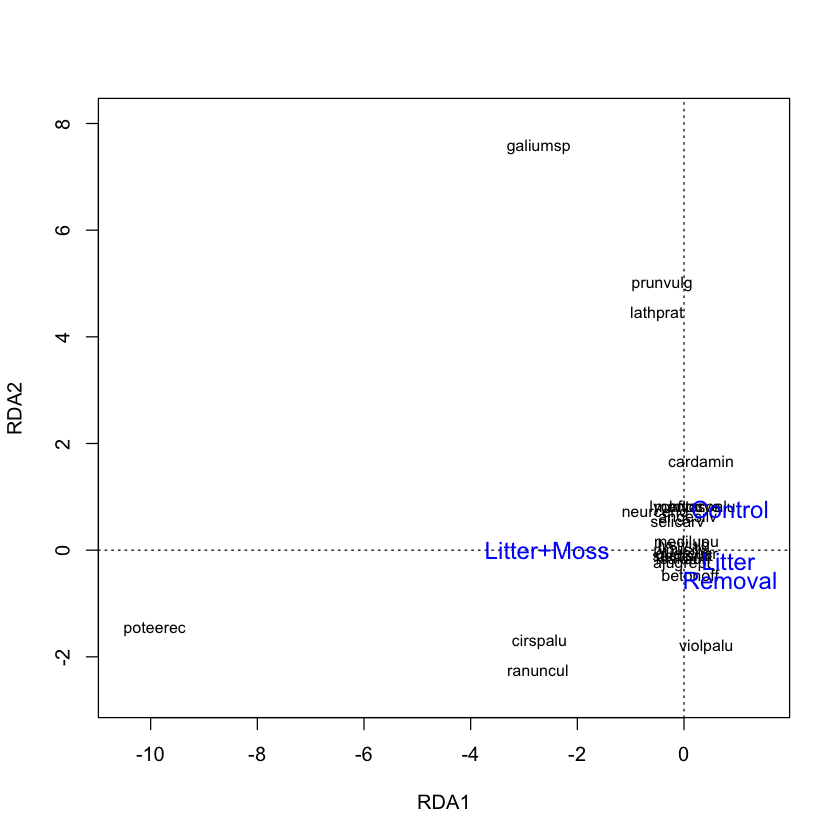

In [13]:
plot(mod1, display = c("species", "cn"), scaling = "sites", type = "n",
     xlim = c(-10.5, 1.5))
text(mod1, display = "species", scaling = 1, cex = 0.8)
text(mod1, display = "cn", scaling = 1, col = "blue", cex = 1.2,
     labels = c("Control", "Litter+Moss", "Litter", "Removal"))

In [14]:
setBlocks(h) <- NULL                    # remove blocking
getBlocks(h)                            # confirm

NULL

In [15]:
set.seed(51)
p2 <- anova(mod1, permutations = h, parallel = 3)
p2

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,3,329.8375,1.999503,0.069
Residual,9,494.8792,NA,NA


In [16]:
#the estimated p value is slightly smaller now 
set.seed(83)
p2axis <- anova(mod1, permutations = h, parallel = 3, by = "axis")
p2axis

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
RDA1,1,284.81413,5.1797031,0.051
RDA2,1,30.82540,0.5605988,0.949
RDA3,1,14.19796,0.2582078,0.949
Residual,9,494.87917,NA,NA


In [17]:
spp.norm <- decostand(spp, method = "normalize", MARGIN = 1)

mod2 <- rda(spp.norm ~ treatment + Condition(block), data = env)
mod2

Call: rda(formula = spp.norm ~ treatment + Condition(block), data = env)

-- Model Summary --

              Inertia Proportion Rank
Total         0.37262    1.00000     
Conditional   0.08138    0.21839    3
Constrained   0.07248    0.19450    3
Unconstrained 0.21877    0.58711    9

Inertia is variance

-- Eigenvalues --

Eigenvalues for constrained axes:
   RDA1    RDA2    RDA3 
0.04517 0.01718 0.01012 

Eigenvalues for unconstrained axes:
    PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9 
0.08026 0.07074 0.02860 0.01916 0.00989 0.00585 0.00223 0.00167 0.00038 


In [18]:
summary(eigenvals(mod2))

,RDA1,RDA2,RDA3,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Eigenvalue,0.0451738,0.01717982,0.01012180,0.0802592,0.07073575,0.02860047,0.01915606,0.009893916,0.005852075,0.002227851,0.001665960,0.0003764604
Proportion Explained,0.1551068,0.05898787,0.03475379,0.2755745,0.24287524,0.09820133,0.06577343,0.033971326,0.020093433,0.007649453,0.005720169,0.0012925982
Cumulative Proportion,0.1551068,0.21409469,0.24884847,0.5244230,0.76729826,0.86549959,0.93127302,0.965244346,0.985337779,0.992987232,0.998707402,1.0000000000


In [19]:
set.seed(76)
anova(mod2, permutations = h, parallel = 3)

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,3,0.07247542,0.9938679,0.467
Residual,9,0.21876774,NA,NA


In [3]:
#soil
#permutation tests 
#ectomycorrhizal fungi


In [4]:
fungi <- read_csv(url("https://bit.ly/fungi-spp"), skip = 1L,
    col_types = "-cddddddddddddddddddddddddddddddddddd") %>%
    mutate(across(Amangemm:Xerosubt, ~ replace_na(.x, 0))) %>%
        select(-(Ncarp:Nspec)) %>%
        rename(label = "...2")

New names:
• `` -> `...1`
• `` -> `...2`


In [5]:
design <- read_csv(url("https://bit.ly/fungi-design"), skip = 1L,
    col_types = "-cccdc") %>%
    rename(label = "...2", Treatment = `LH-treat`) %>%
        mutate(Treatment = fct_relevel(Treatment, "C", after = 0L),
            Treatment = fct_recode(Treatment, control = "C",
                sod_cutting = "S", sod_addition = "A"),
            Stand = factor(Stand),
            SoilType = factor(SoilType))

New names:
• `` -> `...1`
• `` -> `...2`


In [6]:
#testing the effects of whole-plot variables
#balance the design by delteing all plots from ST5 and 6
fungi_bal <- fungi %>%
    left_join(design) %>%
    filter(Treatment != "sod_addition") %>%
    select(label:"Xerosubt") %>%
    mutate(across(-label, ~ log1p(.x))) %>%
    column_to_rownames("label")

Joining with `by = join_by(label)`


In [7]:
design_bal <- design %>%
    filter(Treatment != "sod_addition") %>%
    column_to_rownames("label")

In [8]:
#fit the RDA using the two variables that vary at the stand level
m1 <- rda(fungi_bal ~ Age + SoilType, data = design_bal)
m1

Call: rda(formula = fungi_bal ~ Age + SoilType, data = design_bal)

-- Model Summary --

              Inertia Proportion Rank
Total         27.4042     1.0000     
Constrained    7.8451     0.2863    2
Unconstrained 19.5591     0.7137   31

Inertia is variance

-- Eigenvalues --

Eigenvalues for constrained axes:
 RDA1  RDA2 
6.393 1.453 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8 
7.208 4.524 2.071 1.490 0.908 0.820 0.747 0.479 
(Showing 8 of 31 unconstrained eigenvalues)


In [9]:
RsquareAdj(m1)

$r.squared
[1] 0.2862729

$adj.r.squared
[1] 0.2545517

In [11]:
#permute the whole plot while leaving the split plots (samples within the whole plots) unpermuted 
whole_h <- with(design_bal,
    how(plots = Plots(Stand, type = "free"),
        within = Within(type = "none", constant = FALSE),
        nperm = 999))

In [12]:
set.seed(42)
anova(m1, permutations = whole_h)

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,7.845089,9.024656,0.1097222
Residual,45,19.559138,NA,NA


In [13]:
#testing the effects of stand age adjusting for soil type
#fit an rda to estimate the effect of age and adjusting for effect of soiltype
m2 <- rda(fungi_bal ~ Age + Condition(SoilType), data = design_bal)
m2


Call: rda(formula = fungi_bal ~ Age + Condition(SoilType), data =
design_bal)

-- Model Summary --

               Inertia Proportion Rank
Total         27.40423    1.00000     
Conditional    1.60791    0.05867    1
Constrained    6.23718    0.22760    1
Unconstrained 19.55914    0.71373   31

Inertia is variance

-- Eigenvalues --

Eigenvalues for constrained axes:
 RDA1 
6.237 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8 
7.208 4.524 2.071 1.490 0.908 0.820 0.747 0.479 
(Showing 8 of 31 unconstrained eigenvalues)


In [14]:
#restricted permutation to test the effects of age adjusted for soil type
set.seed(42)
anova(m2, permutations = whole_h)

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,1,6.237182,14.34998,0.07638889
Residual,45,19.559138,NA,NA


In [15]:
#test the effects of treatmet on the abundance of the fungi
#randomizing samples within blocks and keep block fixed 
fungi_all <- fungi %>%
    mutate(across(-label, ~ log1p(.x))) %>%
    column_to_rownames("label")

design_all <- design %>%
    column_to_rownames("label")

In [17]:
#rda to estimate the effect of the treatment while adjusting for the dependence structure
m3 <- rda(fungi_all ~ Treatment + Condition(Stand), data = design_all)

m3

Call: rda(formula = fungi_all ~ Treatment + Condition(Stand), data =
design_all)

-- Model Summary --

              Inertia Proportion Rank
Total         25.1883     1.0000     
Conditional   11.1065     0.4409    5
Constrained    5.0201     0.1993    2
Unconstrained  9.0617     0.3598   31

Inertia is variance

-- Eigenvalues --

Eigenvalues for constrained axes:
 RDA1  RDA2 
4.871 0.149 

Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8 
1.8502 1.5930 1.3938 0.9987 0.7120 0.5380 0.5085 0.3620 
(Showing 8 of 31 unconstrained eigenvalues)


In [18]:
split_h <- with(design_all,
    how(blocks = Stand,
        within = Within(type = "free"),
        nperm = 999))

In [19]:
set.seed(42)
anova(m3, permutations = split_h)

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,5.020103,15.51182,0.001
Residual,56,9.061661,NA,NA


In [20]:
m4 <- rda(fungi_all ~ Treatment:Age + 
            Condition(Stand + Treatment + Treatment * SoilType),
          data = design_all)
m4


Some constraints or conditions were aliased because they were redundant. This
can happen if terms are linearly dependent (collinear): ‘SoilTypepodzol’,
‘Treatmentsod_cutting:Age’



Call: rda(formula = fungi_all ~ Treatment:Age + Condition(Stand + Treatment
+ Treatment * SoilType), data = design_all)

-- Model Summary --

               Inertia Proportion Rank
Total         25.18831    1.00000     
Conditional   16.71618    0.66365    9
Constrained    0.96202    0.03819    2
Unconstrained  7.51011    0.29816   31

Inertia is variance

-- Note --

Some constraints or conditions were aliased because they were redundant.
This can happen if terms are linearly dependent (collinear):
‘SoilTypepodzol’, ‘Treatmentsod_cutting:Age’

-- Eigenvalues --

Eigenvalues for constrained axes:
  RDA1   RDA2 
0.8105 0.1515 

Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8 
1.5265 1.3627 0.9535 0.8659 0.5603 0.5044 0.3872 0.3433 
(Showing 8 of 31 unconstrained eigenvalues)


In [21]:
anova(m4, permutations = split_h)

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,0.9620197,3.330511,0.001
Residual,52,7.5101124,NA,NA


In [22]:
m4 <- rda(fungi_all ~ Age + Treatment + Treatment:Age + 
            Condition(Stand + SoilType + Treatment:SoilType),
          data = design_all)


Some constraints or conditions were aliased because they were redundant. This
can happen if terms are linearly dependent (collinear): ‘SoilTypepodzol’,
‘Age’, ‘Treatmentsod_addition’, ‘Treatmentsod_cutting’



In [23]:
anova(m4, permutations = split_h, by = "margin")

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Age:Treatment,2,0.9620197,3.330511,0.001
Residual,52,7.5101124,NA,NA
